# Part 6.2 - Analysis and Visualization
---
### Papers Past Topic Modeling
<br/>

Ben Faulks - bmf43@uclive.ac.nz

Xiandong Cai - xca24@uclive.ac.nz

Yujie Cui - ycu23@uclive.ac.nz

In [1]:
import os, sys, subprocess
sys.path.insert(0, '../utils') # for import customed modules
import pandas as pd

# for ploting
import seaborn as sns
from matplotlib import pyplot as plt
import holoviews as hv
from holoviews import opts
plt.style.use('seaborn-darkgrid')
sns.axes_style("darkgrid")
%matplotlib inline

**Function for plot:**

In [2]:
def plot_topics(df, kind='', adjust_top=0.97, title='', height=4, col_wrap=2):
    if kind == 'scatter':
        g = sns.catplot(x="year", y='weight', hue="topic", col='keywords', col_wrap=col_wrap, 
                    kind='strip', height=height, aspect=2, jitter=1, dodge=False, s=5, legend=False,
                    data=df)
        g.fig.suptitle("Dominant Topics Distribution of {} Over Year".format(title), fontsize=16)
        
    elif kind == 'bar':
        g = sns.catplot(x="year", hue="topic", col='keywords', col_wrap=col_wrap, 
                    kind='count', height=height, aspect=2, dodge=False, legend=False, 
                    data=df)
        g.fig.suptitle("Dominant Topics Count of {} Over Year".format(title), fontsize=16)
        
    elif kind == 'point':
        g = sns.catplot(x="year", y='weight',  col='keywords', col_wrap=col_wrap, 
                    kind='point', height=height, aspect=2, dodge=False, s=1, legend=False, 
                    data=df)
        g.fig.suptitle("Average Weight of {} Over Year".format(title), fontsize=16)
        
    else:
        print('wrong kind.')
        
    g.fig.subplots_adjust(top=adjust_top)
    g.set_xticklabels(rotation=90, step=2)
    return g

## 1 Topics Over Year in General

**In this part we will using the full dataset for analysis and visualiztion to find features in the dataset.** 

### 1.1 Load dataframes

**Load the the dataframes:**
* topic words list
* dominant topics per document dataframe
* topic average weight per year dataframe

**Topics List:**

In [3]:
path = r'../5-model/model_train/topicKeys.txt'

df_topics = pd.read_table(path, 
                          header=None, 
                          index_col=None, 
                          names = ['topic_', 'weight_', 'keywords'],
                          encoding='utf8').sort_values(by='topic_').reset_index(drop=True)

topics_shape = df_topics.shape

print('Shape of dataframe:', topics_shape)
df_topics.head(5)

Shape of dataframe: (250, 3)


topic_  weight_                                           keywords
0       0  0.01008  mr party government minister labour sir ward j...
1       1  0.01015  bank cent loan zealand london banks money exch...
2       2  0.00692  company apply freight steam passage zealand pa...
3       3  0.03237  man people men public law good fact make thing...
4       4  0.00528  fruit apples pears case potatoes plums peaches...

**Dominant topics per document dataframe:**

In [4]:
path = r'./train/domTopics/domTopics.csv'

df_dominant = pd.read_csv(path, 
                          header=None, 
                          index_col=None, 
                          names = ['id', 'region', 'year', 'topic', 'weight', 'keywords'],
                          dtype={2:'str'},
                          encoding='utf8').sort_values(by='id').reset_index(drop=True)

print('Shape of dataframe:', df_dominant.shape)
df_dominant.head(5)

Shape of dataframe: (160140, 6)


id      region  year  topic    weight  \
0  1854232    Auckland  1863      2  0.187764   
1  1854244    Auckland  1863    196  0.334527   
2  1854262    Auckland  1863    200  0.422053   
3  1854275    Auckland  1863    211  0.406851   
4  1854588  Canterbury  1887    240  0.689759   

                                            keywords  
0  company apply freight steam passage zealand pa...  
1  business public street begs attention notice m...  
2  life man world great years english work men pe...  
3  goods street stock prices large wholesale cash...  
4  french government russia paris troops france b...

**Topic average weight per year dataframe:**

In [5]:
path = r'./train/avgWeight/avgWeight.csv'

# generate new column names
columns = [str(x) for x in list(range(topics_shape[0]))]
columns.insert(0, 'year')

df_avgweight = pd.read_csv(path, 
                           header=None, 
                           index_col=None, 
                           names = columns,
                           dtype={0:'str'},
                           encoding='utf8')

# melt for plot
df_avgweight = pd.melt(df_avgweight,
                       id_vars='year',
                       value_vars=list(df_avgweight.columns[1:]),
                       var_name='topic',
                       value_name='weight')
# change data type
df_avgweight.topic = df_avgweight.topic.astype(int)

# join
df_avgweight = (df_avgweight
                .merge(df_topics, left_on='topic', right_on='topic_')
                .drop('topic_', axis=1)
                .drop('weight_', axis=1)
                .sort_values(by=['year', 'topic'])
                .reset_index(drop=True))


print('Shape of dataframe:', df_avgweight.shape)
df_avgweight.sample(5)

Shape of dataframe: (25750, 4)


year  topic    weight  \
20623  1925    123  0.000831   
2636   1850    136  0.000036   
4610   1858    110  0.003651   
7078   1868     78  0.002590   
2534   1850     34  0.000019   

                                                keywords  
20623  sale harness horses horse draught farm mr cows...  
2636   whangarei auckland cameron kamo street bank hi...  
4610   building room buildings ft city house feet str...  
7078   money lend security freehold sums interest rat...  
2534   street times office dunedin sale words cash ja...

### 1.2 First 10 Topics

**MALLET output the topics keywords list, here we plot first 10 topics in the list. We use scatter plot and bar chart to see the distribution of topics. We can find that the distribution is vary follow the year.**

**Show first 10 topics and the number of its dominant topics:**

In [6]:
# show first 10 topics, keywords and count number
def show_topics10(df):
    print(df.groupby(['topic', 'keywords']).size().reset_index(name='count').sort_values('topic', ascending=True)[:10])

show_topics10(df_dominant)

   topic                                           keywords  count
0      0  mr party government minister labour sir ward j...    665
1      1  bank cent loan zealand london banks money exch...    628
2      2  company apply freight steam passage zealand pa...    534
3      3  man people men public law good fact make thing...   1668
4      4  fruit apples pears case potatoes plums peaches...    124
5      5  good time year made week great work present da...   1016
6      6  napier hastings bay hawke waipawa dannevirke w...     62
7      7  hotel proprietor accommodation spirits wines p...    948
8      8  st handicap time won meeting dividend bst mile...   1121
9      9  young man father lady wife years woman life gi...    757


**Filter the dominant topics dataframe of first 10 topics:**

In [7]:
# get and print dataframe to visualize
def filter_topics(df, list_topics):
    return (df[df['topic'].isin(list_topics)].sort_values(by='topic', ascending=True))

In [8]:
topics10 = range(10)
df_topics10 = filter_topics(df_dominant, range(10))

print('Shape of dataframe:', df_topics10.shape)
df_topics10.sample(5)

Shape of dataframe: (7523, 6)


id             region  year  topic    weight  \
137653  27029536          Northland  1916      0  0.360972   
79847   16076106  Manawatu-Wanganui  1909      3  0.465505   
73516   15113820         West Coast  1911      5  0.285155   
52111   10973599              Otago  1895      5  0.189726   
67089   13619587           Taranaki  1903      5  0.234135   

                                                 keywords  
137653  mr party government minister labour sir ward j...  
79847   man people men public law good fact make thing...  
73516   good time year made week great work present da...  
52111   good time year made week great work present da...  
67089   good time year made week great work present da...

**Filter the topic average weight dataframe for first 10 topics:**

In [9]:
df_avgw10 = filter_topics(df_avgweight, topics10)

print('Shape of dataframe:', df_avgw10.shape)
df_avgw10.sample(5)

Shape of dataframe: (1030, 4)


year  topic    weight  \
6007   1864      7  0.005004   
5506   1862      6  0.003857   
5002   1860      2  0.019352   
16259  1908      9  0.004316   
13009  1892      9  0.006346   

                                                keywords  
6007   hotel proprietor accommodation spirits wines p...  
5506   napier hastings bay hawke waipawa dannevirke w...  
5002   company apply freight steam passage zealand pa...  
16259  young man father lady wife years woman life gi...  
13009  young man father lady wife years woman life gi...

**Dominant topics distribution:**

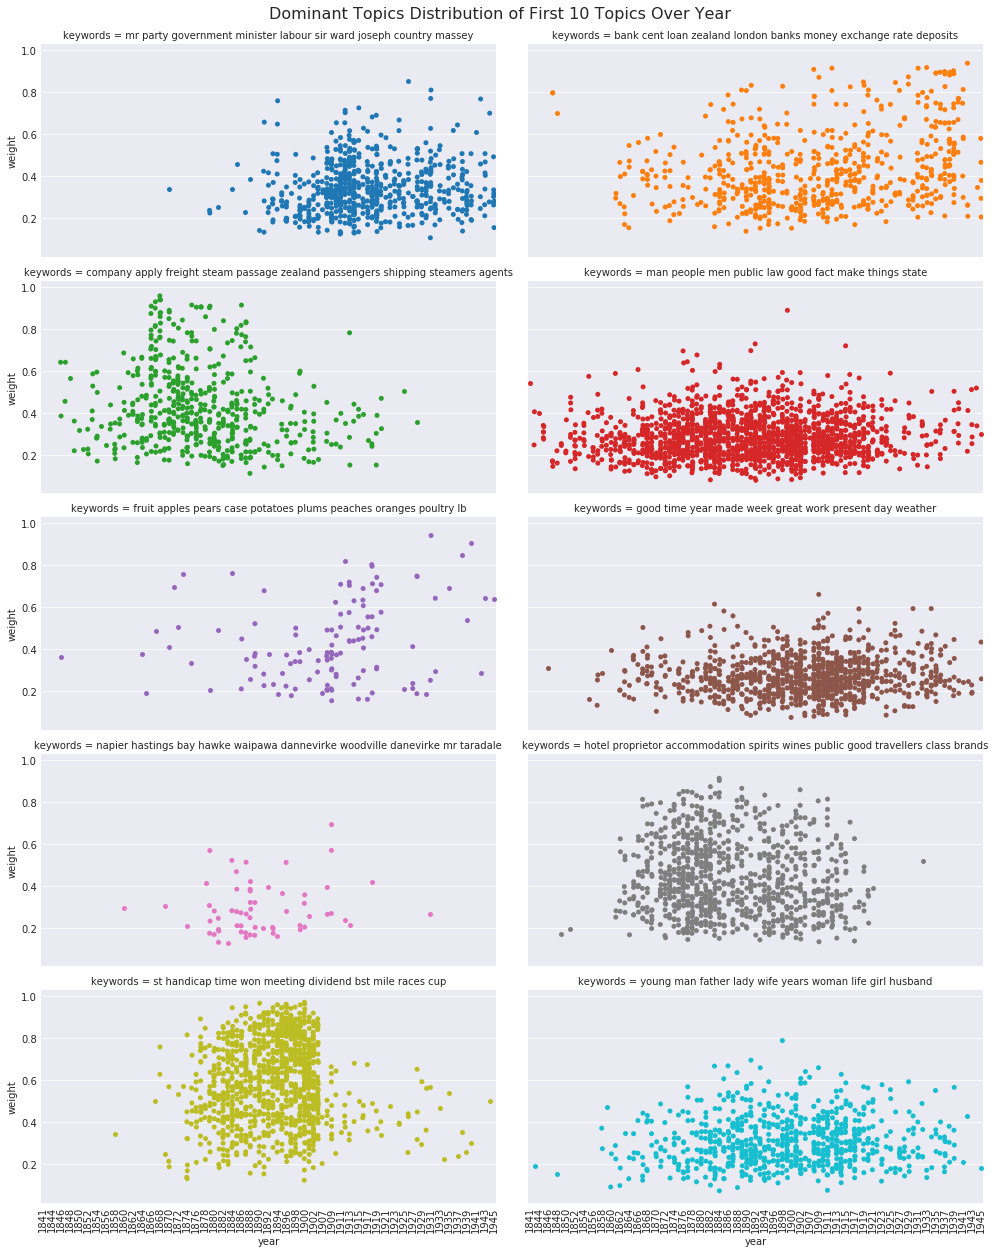

In [10]:
plot_topics(df_topics10, 
            'scatter', 
            adjust_top=0.95,
            title='First 10 Topics',
            height=3.5,
            col_wrap=2)

**Dominant topics count:**

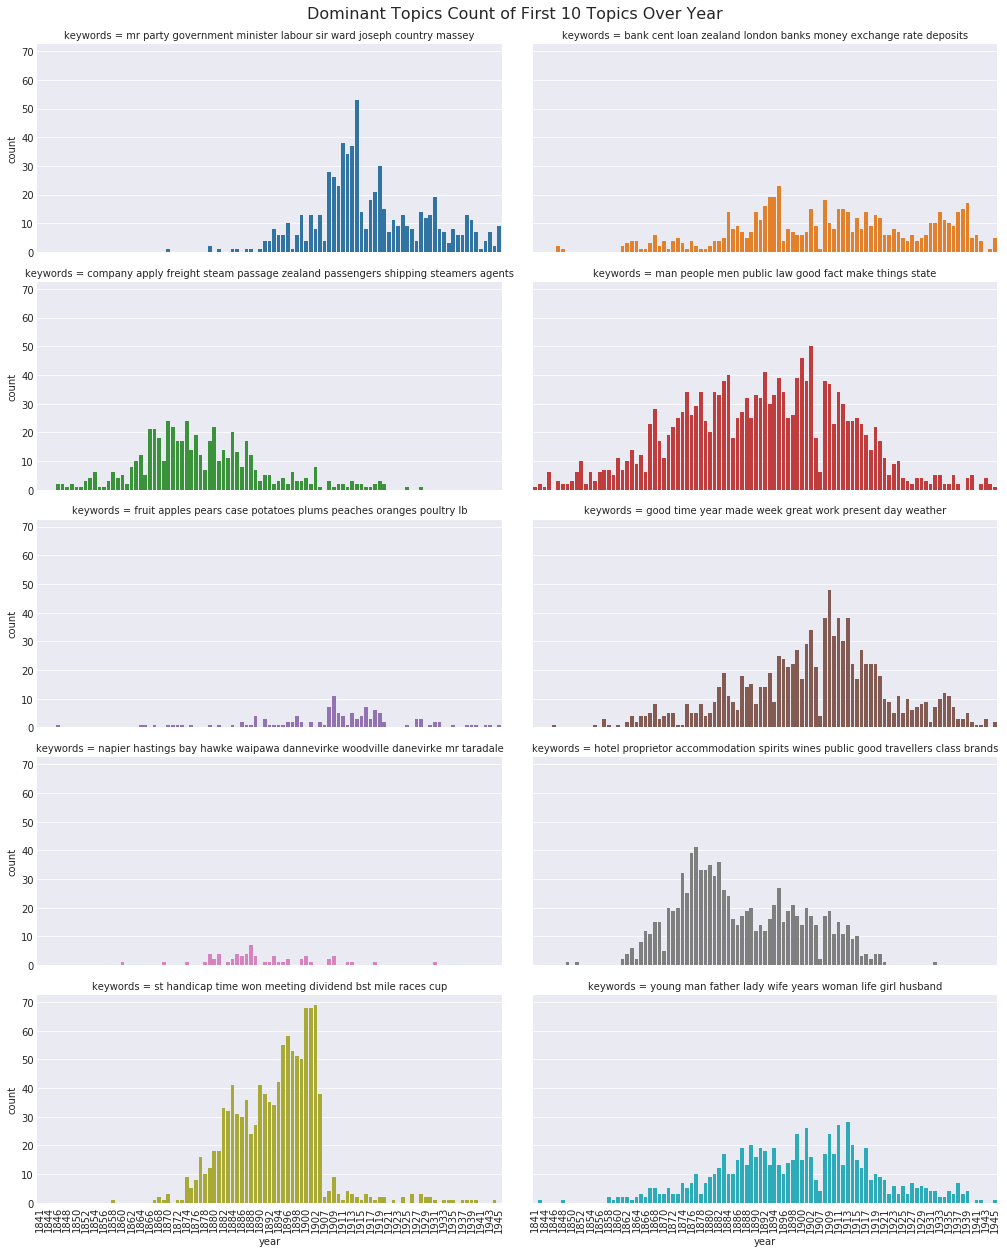

In [11]:
plot_topics(df_topics10, 
            'bar', 
            adjust_top=0.95,
            title='First 10 Topics',
            height=3.5,
            col_wrap=2)

**Average weight:**

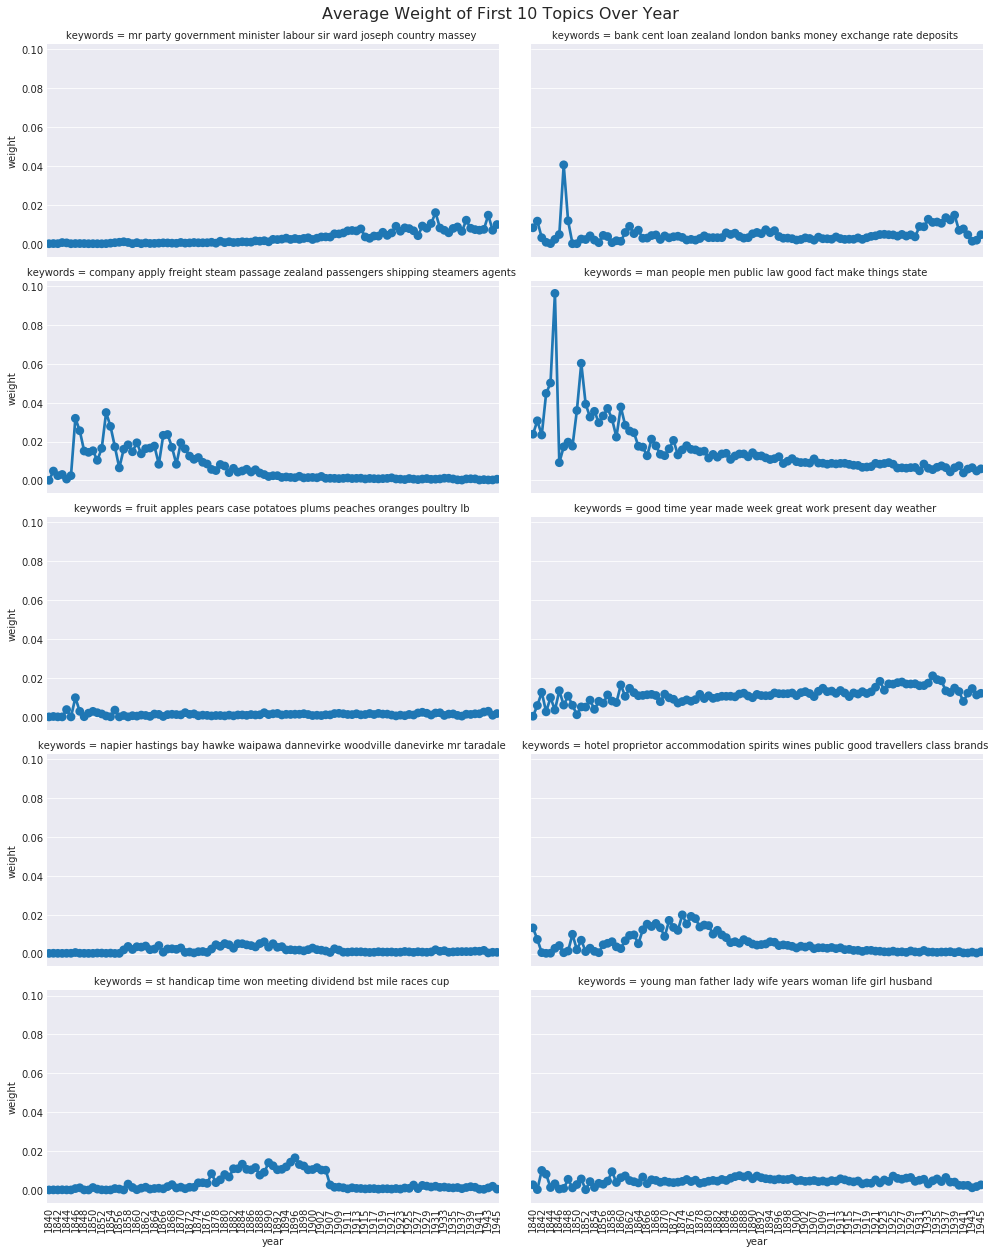

In [12]:
plot_topics(df_avgw10, 
            'point', 
            adjust_top=0.95,
            title='First 10 Topics',
            height=3.5,
            col_wrap=2)

### 1.3 By Specific Topics

**Here we select 4 typical topics which may vary with different era to visualize.**

* #54 strike
* #99 train
* #106 gold
* #161 german

In [13]:
topics4 = [54, 99, 106, 161]

df_topics4 = filter_topics(df_dominant, topics4)

print('Shape of dataframe:', df_topics4.shape)
df_topics4.sample(5)

Shape of dataframe: (5612, 6)


id             region  year  topic    weight  \
82155   16403655         Canterbury  1921     54  0.561376   
96461   18302596         Wellington  1927     99  0.275748   
4658     2573140  Manawatu-Wanganui  1877    161  0.414660   
121275  24857792      Bay of Plenty  1916    161  0.516676   
136212  26858481          Northland  1910     54  0.371033   

                                                 keywords  
82155   strike union men work labour workers wages min...  
96461   train car railway motor road engine cars drive...  
4658    german germany war berlin peace received franc...  
121275  german germany war berlin peace received franc...  
136212  strike union men work labour workers wages min...

In [14]:
df_avgw4 = filter_topics(df_avgweight, topics4)

print('Shape of dataframe:', df_avgw4.shape)
df_avgw4.sample(5)

Shape of dataframe: (412, 4)


year  topic    weight  \
3856   1855    106  0.000154   
161    1840    161  0.000164   
23099  1935     99  0.009841   
12106  1888    106  0.001827   
22599  1933     99  0.008233   

                                                keywords  
3856   gold silver watches jewellery clocks rings jew...  
161    german germany war berlin peace received franc...  
23099  train car railway motor road engine cars drive...  
12106  gold silver watches jewellery clocks rings jew...  
22599  train car railway motor road engine cars drive...

**Dominant topics distribution:**

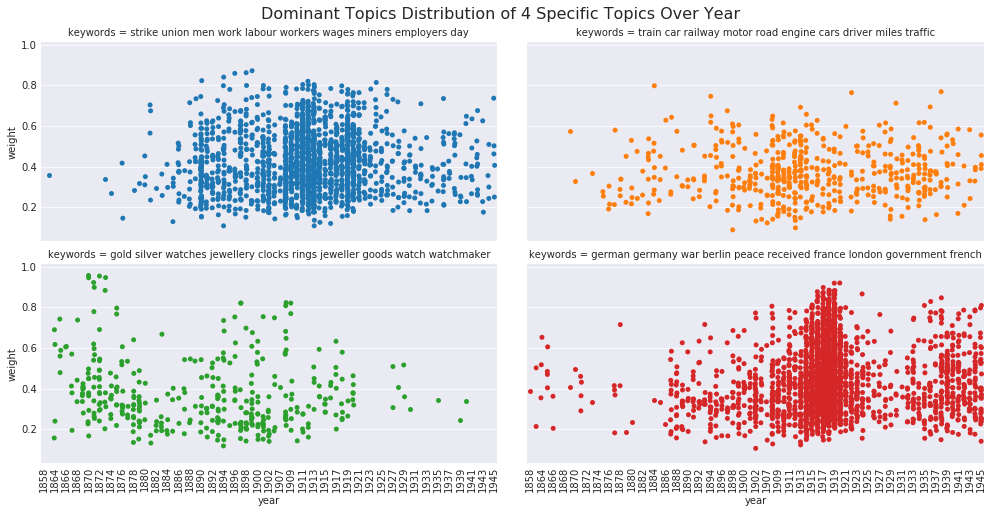

In [15]:
plot_topics(df_topics4, 
            'scatter', 
            adjust_top=0.91,
            title='4 Specific Topics',
            height=3.5,
            col_wrap=2)

**Dominant topics count:**

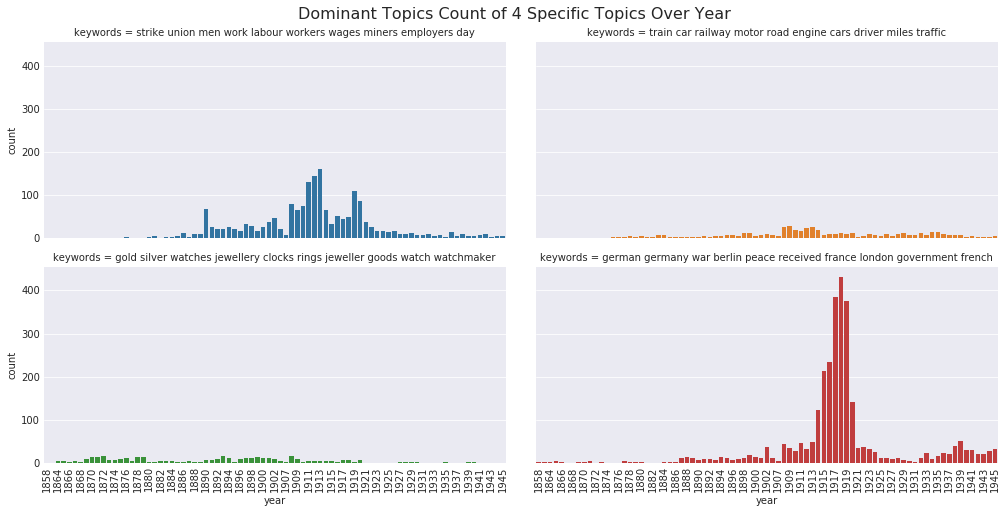

In [16]:
plot_topics(df_topics4, 
            'bar', 
            adjust_top=0.91,
            title='4 Specific Topics',
            height=3.5,
            col_wrap=2)

**Average weight:**

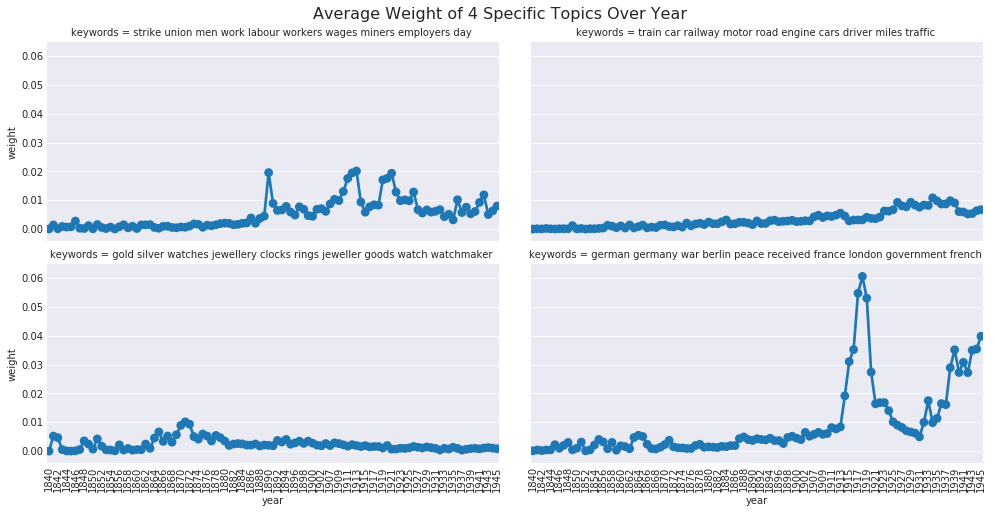

In [17]:
plot_topics(df_avgw4, 
            'point', 
            adjust_top=0.91,
            title='4 Specific Topics',
            height=3.5,
            col_wrap=2)